In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
raw_df = pd.read_csv('../input/avocado.csv')

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
# Drop redundant data
df = raw_df.drop(['Unnamed: 0', '4046', '4225', '4770', 'Small Bags', 'Total Bags', 'Large Bags', 'XLarge Bags'],
                 axis=1)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['type'] = df['type'].astype('category')
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['weekday'] = df['Date'].dt.dayofweek
df.info()
# df.shape
print(df.columns)

# df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   type          18249 non-null  category      
 4   year          18249 non-null  int64         
 5   region        18249 non-null  object        
 6   day           18249 non-null  int64         
 7   month         18249 non-null  int64         
 8   weekday       18249 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 1.1+ MB
Index(['Date', 'AveragePrice', 'Total Volume', 'type', 'year', 'region', 'day',
       'month', 'weekday'],
      dtype='object')


In [6]:
# metadata analysis
# Datetime data points

datepoints = df['Date'].nunique()
months = df['month'].nunique()
years = df['year'].nunique()
days = df['day'].nunique()
weekday = df['weekday'].nunique()
weekday_counts = df['weekday'].value_counts()
print(datepoints,
      months,
      years,
      days,
      weekday,
      weekday_counts,
      sep='\n')

timedata_by_year = df.groupby(['year', 'month'])['day']
timedata_by_month = df.groupby(['month'])['day']
timedata_by_day = df.groupby(['day'])['day']
td_by_year = timedata_by_year.count()
td_by_year_counts = timedata_by_year.value_counts()
td_by_month = timedata_by_month.count()
td_by_day = timedata_by_day.count()
print(td_by_year,
      td_by_year_counts,
      td_by_month,
      td_by_day,
      sep='\n'
      )


169
12
4
31
1
6    18249
Name: weekday, dtype: int64
year  month
2015  1        432
      2        432
      3        540
      4        432
      5        540
      6        432
      7        432
      8        540
      9        432
      10       432
      11       540
      12       431
2016  1        540
      2        432
      3        432
      4        432
      5        540
      6        432
      7        540
      8        432
      9        432
      10       540
      11       432
      12       432
2017  1        540
      2        432
      3        432
      4        540
      5        432
      6        430
      7        540
      8        432
      9        432
      10       540
      11       432
      12       540
2018  1        432
      2        432
      3        432
Name: day, dtype: int64
year  month  day
2015  1      4      108
             11     108
             18     108
             25     108
      2      1      108
                   ... 
2018  2  

In [7]:
# AveragePrice data
avg_price = df['AveragePrice']
global_avg = avg_price.mean()  # 1.41
global_avg_counts = avg_price.value_counts()
nunique = avg_price.nunique()
smallest_avg = avg_price.nsmallest()
largest_avg = avg_price.nlargest()
print(round(global_avg, 2),
      global_avg_counts,
      nunique,
      smallest_avg,
      largest_avg,
      sep='\n')


1.41
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.05      1
3.03      1
2.91      1
0.48      1
2.96      1
Name: AveragePrice, Length: 259, dtype: int64
259
15261    0.44
7412     0.46
15473    0.48
1716     0.49
15262    0.49
Name: AveragePrice, dtype: float64
14125    3.25
17428    3.17
14124    3.12
16055    3.05
16720    3.04
Name: AveragePrice, dtype: float64


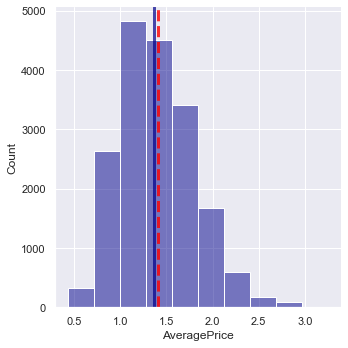

In [92]:
# AveragePrice data distribution

mean_AP = df['AveragePrice'].mean()
median_AP = df['AveragePrice'].median()
sns.displot(df['AveragePrice'], bins= 10, color='darkblue', alpha=.5)
plt.axvline(mean_AP, color='red', linewidth=3, linestyle='--', alpha=0.8)
plt.axvline(median_AP, linewidth=3,  color='darkblue', alpha=.7)
plt.show()

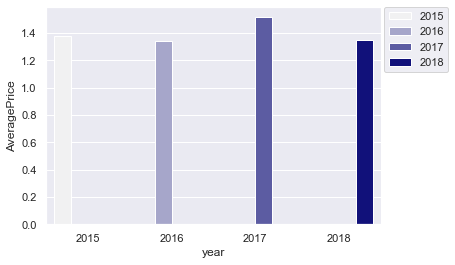

In [93]:
# Average price by year
sns.set(rc={'figure.figsize': (6, 4)})
sns.barplot(x='year', y='AveragePrice', data=df, color='darkblue', hue='year', ci=False)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

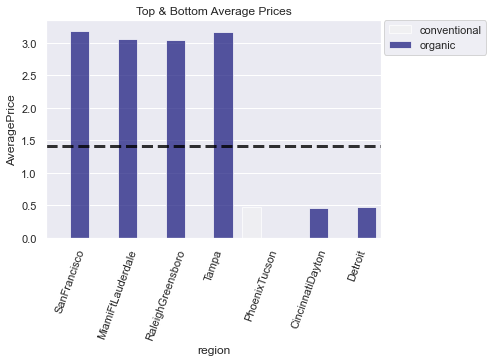

In [94]:
# Top and Bottom Average Price by region
top_regions_avg = df['AveragePrice'].nlargest()
top_regions_df = df[df['AveragePrice'].isin(top_regions_avg)]
low_regions_avg = df['AveragePrice'].nsmallest()
low_regions_df = df[df['AveragePrice'].isin(low_regions_avg)]
low_top_compare = pd.concat([top_regions_df.assign(datset='top_regions_df'), low_regions_df.assign(dataset='low_regions_avg')])

sns.set(rc={'figure.figsize':(6, 4)})
sns.barplot(x='region', y='AveragePrice', data=low_top_compare, color='darkblue', ci=False, alpha=.7, hue='type')\
    .set_title('Top & Bottom Average Prices')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.axhline(mean_AP, color='black', linewidth=3, linestyle='--', alpha=0.8)
plt.xticks(rotation=70)
plt.show()

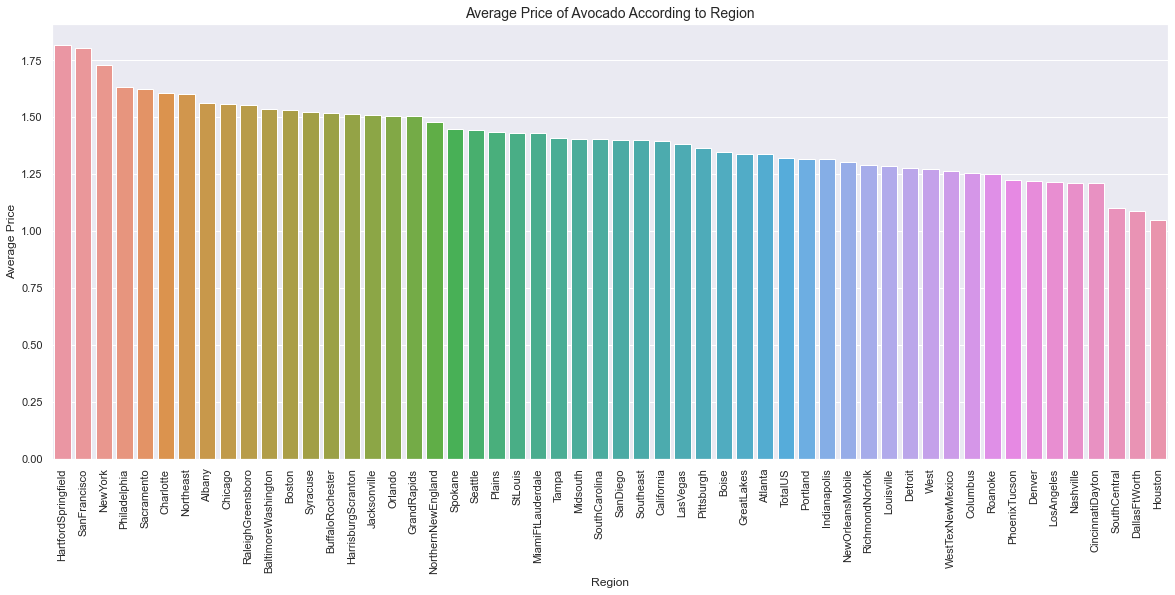

In [123]:
region_list=list(df.region.unique())
average_price=[]

for region in region_list:
    x=df[df.region==region]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df_regions=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df_regions.average_price.sort_values(ascending=False).index.values
sorted_data=df_regions.reindex(new_index)

plt.figure(figsize=(20,8))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region', fontsize=14);



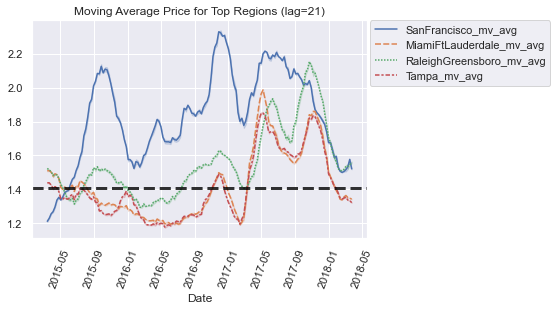

In [97]:
# Moving Average Price Top

moving_avg_df_top = pd.DataFrame()
# moving_avg_df.empty

for region in top_regions_df['region'].unique():
    # reg_df = df.copy()[df['type']=='organic']
    reg_df = df.copy()[df['region']==region]
    reg_df['Date'] = pd.to_datetime(df['Date'])
    reg_df.set_index('Date', inplace=True)
    reg_df.sort_index(inplace=True)

    reg_df[f'{region}_mv_avg'] = reg_df['AveragePrice'].rolling(21).mean()

    if moving_avg_df_top.empty:
        moving_avg_df_top = reg_df[[f'{region}_mv_avg']]
    else:
        moving_avg_df_top = moving_avg_df_top.join(reg_df[f'{region}_mv_avg'])

# moving_avg_df_top.info()
sns.lineplot(data=moving_avg_df_top).set_title('Moving Average Price for Top Regions (lag=21)')
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.axhline(mean_AP, color='black', linewidth=3, linestyle='--', alpha=0.8)
plt.show()

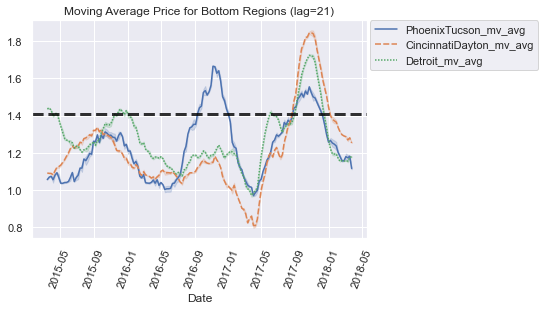

In [98]:

# Moving Average Price Bottom

moving_avg_df_bottom = pd.DataFrame()
# moving_avg_df.empty

for region in low_regions_df['region'].unique():
    # reg_df = df.copy()[df['type']=='organic']
    reg_df = df.copy()[df['region']==region]
    reg_df['Date'] = pd.to_datetime(df['Date'])
    reg_df.set_index('Date', inplace=True)
    reg_df.sort_index(inplace=True)

    reg_df[f'{region}_mv_avg'] = reg_df['AveragePrice'].rolling(21).mean()

    if moving_avg_df_bottom.empty:
        moving_avg_df_bottom = reg_df[[f'{region}_mv_avg']]
    else:
        moving_avg_df_bottom = moving_avg_df_bottom.join(reg_df[f'{region}_mv_avg'])

# moving_avg_df_bottom.info()
sns.lineplot(data=moving_avg_df_bottom).set_title('Moving Average Price for Bottom Regions (lag=21)')
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.axhline(mean_AP, color='black', linewidth=3, linestyle='--', alpha=0.8)
plt.show()

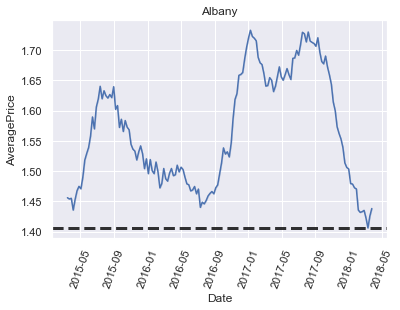

In [96]:
# For Chosen Regions
df_albany = df.copy()[df['region'] == 'Albany']
df_albany['Date'] = pd.to_datetime(df['Date'])
df_albany.set_index('Date', inplace=True)
df_albany.sort_index(inplace=True)
df_rolling = df_albany['AveragePrice'].rolling(21).mean()
sns.lineplot(data=df_rolling, ci=False).set_title('Albany')
plt.xticks(rotation=70)
plt.axhline(mean_AP, color='black', linewidth=3, linestyle='--', alpha=0.8)
plt.show()

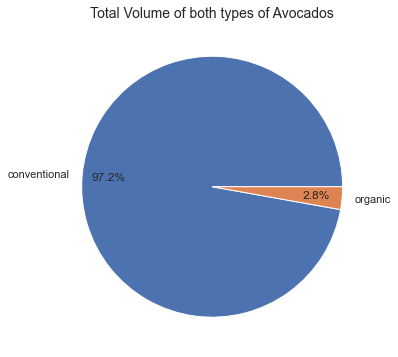

In [110]:
# Organic vs Conventional
type = df.groupby('type')['Total Volume'].sum()

pie, ax = plt.subplots(figsize=[8,6])
labels = type.keys()
plt.pie(x=type, autopct='%.1f%%', labels=labels, pctdistance=.8)
plt.title('Total Volume of both types of Avocados', fontsize=14);
# pie.savefig("Avocado.png")

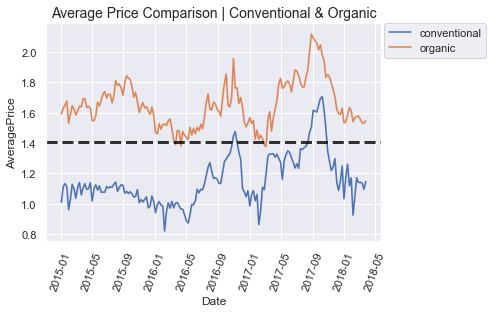

In [116]:

# plt.figure(figsize=(8,10))
sns.lineplot(x='Date', y='AveragePrice', hue='type', data=df, color='darkblue', ci=False)\
    .set_title('Average Price Comparison | Conventional & Organic', fontsize=14)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.axhline(mean_AP, color='black', linewidth=3, linestyle='--', alpha=0.8)
plt.xticks(rotation=70)
plt.show()

